# Natural Language Processing (NLP)
* NLP is the processing of a text collection
    * Text collection: a corpus (corpora for plural)
    * Examples
        * Your responses to free response questions on surveys
        * Social media posts
        * Messaging conversations
        * Books, articles, blog posts, ...
        * Etc.
* NLP is notoriously difficulty because natural language lacks mathematical precision
* Thankfully, there are alot of really great Python libraries for NLP!!!
    * Let's see some of these in action with business reviews from the [Yelp API](https://www.yelp.com/developers)
    
# NLP Demo w/Yelp API
Yelp Developers: https://www.yelp.com/developers and more specifically the Yelp Fusion API documentation: https://docs.developer.yelp.com/docs/fusion-intro

In [ ]:
import requests
import json

# free API key access has disappeared... free trial access only (bummer!)
# documentation at https://docs.developer.yelp.com/docs/fusion-authentication
api_key = "YOUR API KEY HERE"
headers = {"Authorization": "Bearer " + api_key}
    
def get_place_id(search_term):
    # documentation at https://www.yelp.com/developers/documentation/v3/business_search
    url = "https://api.yelp.com/v3/businesses/search"
    url += "?term=" + search_term
    # GU GPS coords
    url += "&latitude=47.6670357"
    url += "&longitude=-117.403623"
    
    response = requests.get(url=url, headers=headers)
    json_object = json.loads(response.text)

    place_id = json_object["businesses"][0]["id"]
    print(search_term, "id:", place_id)
    
    return place_id
    
def get_reviews(search_term):
    # documentation at https://www.yelp.com/developers/documentation/v3/business_reviews
    # returns three reviews in yelp "default order"
    place_id = get_place_id(search_term)
    url = "https://api.yelp.com/v3/businesses/" + place_id + "/reviews"
    response = requests.get(url=url, headers=headers)
    json_object = json.loads(response.text)
    reviews_array = json_object["reviews"]
    reviews_text = []
    for review_object in reviews_array:
        reviews_text.append(review_object["text"])
    return reviews_text

restaurant1 = "mango+tree"
restaurant2 = "aloha+island+grill"
reviews_dict = {restaurant1: get_reviews(restaurant1), restaurant2: get_reviews(restaurant2)}

mango+tree id: lAE1Sdf3ZCjR1LiBa8dcmw
aloha+island+grill id: VfiOXd_UzBj1D1-Fqvn0xg


In [2]:
for name, reviews in reviews_dict.items():
    print("***",name, "reviews", "***")
    for i, review in enumerate(reviews):
        print(f"{i}: \"{review}\"")
    print()

*** mango+tree reviews ***
0: "Mango lamb amazing.
Coconut rice plush
Lamb chop= off the hook
Beef kabob= amazing
Naan well= always naan
Very good place omg"
1: "Ordered tikka masala through uber eats. It arrived fast and one order of naan was enough for two huge meals.  The tikka masala was flavorful and delicious...."
2: "The food was delicious. Great portion sizes. Each entree comes with yummy rice. Located near Riverfront Park."

*** aloha+island+grill reviews ***
0: "I currently live in Hawaii. I have searched high low for a Mac salad as good as Aloha grill in Spokane. 
Confused as hell how Spokane has the best Hawaiian..."
1: "The food, overcooked, should not be called although grill should be called the messy grill. The service is done by a bunch of guys that are unshaven and..."
2: "I decided to give it a second chance but change location. I've tried both and they all have managed to burn the beef. To the point you can't even eat..."



## Task 1
Compute the average polarity of the reviews using `textblob` module (polarity indicates sentiment in [-1.0 (negative), 1.0 (positive)] 0.0 is neutral). Does this seem in line with the average rating for each business?

In [3]:
from textblob import TextBlob

def compute_average_polarity(reviews):
  polarities = []
  for review in reviews:
    blob = TextBlob(review)
    polarities.append(blob.sentiment.polarity)

  return sum(polarities) / len(polarities)

for place, reviews in reviews_dict.items():
  print(place, "average polarity:", compute_average_polarity(reviews))

mango+tree average polarity: 0.5788888888888889
aloha+island+grill average polarity: 0.022020202020202013


## Task 2
Visualize the frequencies of words in both sets of business reviews with word clouds using `wordcloud` module. Do the most frequent words in each provide more context for your polarity result?

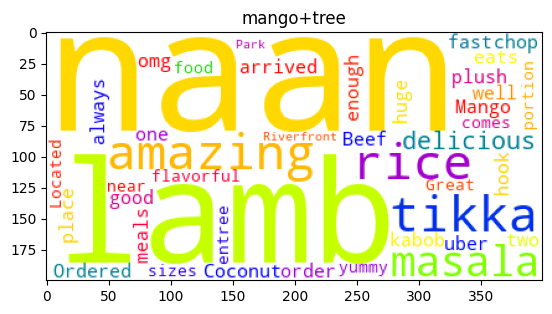

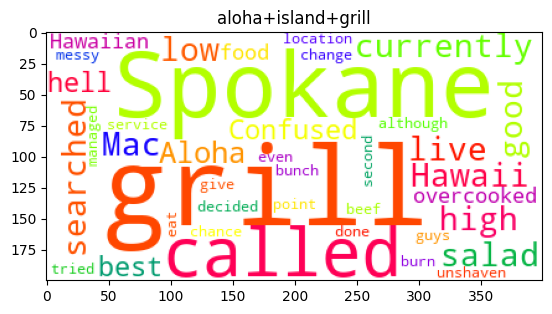

In [4]:
from wordcloud import WordCloud 
# wordcloud built on matplotlib
import matplotlib.pyplot as plt
def show_wordcloud(name, text):
  wc = WordCloud(colormap="prism", background_color="white")
  wc.generate(text)
  plt.imshow(wc)
  plt.title(name)
  plt.show()
for place, reviews in reviews_dict.items():
  reviews_str = ". ".join(reviews)
  show_wordcloud(place, reviews_str)

## Task 3
Compute readability scores for each set of reviews using `textatistic` module. Compare the Dale-Chall scores, which is a score that can be mapped to grade levels from 4 and below to college graduate (grade 16) and above. This score is considered to be most reliable for a broad range of text types.

What can these scores be used for? (with the small sample size we have we can't make any definitive conclusions...)

In [5]:
from textatistic import Textatistic 

def print_readability_scores(name, text):
  print(name, "readability scores")
  readability = Textatistic(text)
  for stat, value in readability.dict().items():
    print(stat, "->", value)
  print()

for place, reviews in reviews_dict.items():
  reviews_str = ". ".join(reviews)
  print_readability_scores(place, reviews_str)

mango+tree readability scores
char_count -> 330
word_count -> 66
sent_count -> 13
sybl_count -> 82
notdalechall_count -> 22
polysyblword_count -> 3
flesch_score -> 96.57283216783217
fleschkincaid_score -> 1.0506060606060625
gunningfog_score -> 3.8489510489510494
smog_score -> 5.873414542411695
dalechall_score -> 9.151648717948719

aloha+island+grill readability scores
char_count -> 381
word_count -> 88
sent_count -> 16
sybl_count -> 100
notdalechall_count -> 19
polysyblword_count -> 1
flesch_score -> 105.11613636363636
fleschkincaid_score -> -0.03590909090908845
gunningfog_score -> 2.6545454545454548
smog_score -> 4.557286568694721
dalechall_score -> 7.318504545454545



## Task 4
Perform named entity recognition using `spaCy`. What dates, times, quantities, places, people, things, organizations, do people mention in their reviews of these businesses?

In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")

for place, reviews in reviews_dict.items():
  print(place)
  reviews_str = ". ".join(reviews)
  document = nlp(reviews_str)
  for entity in document.ents:
    print(entity.text, "->", entity.label_)
  print()

mango+tree
Mango -> LOC
Beef kabob= -> WORK_OF_ART
Naan -> GPE
one -> CARDINAL
two -> CARDINAL
Riverfront Park -> FAC

aloha+island+grill
Hawaii -> GPE
Mac -> ORG
Aloha -> LOC
Spokane -> GPE
Spokane -> GPE
Hawaiian -> NORP
second -> ORDINAL



## Task 5
Calculate document similarity using `spaCy` to determine how alike the review sets are in terms of word frequencies, writing styles, etc. Do you hypothesize there are other businesses (but still in this category) that would have reviews that are more or less similar to these? Test your theories out with the API and `spaCy` :)

In [7]:
document1 = nlp(". ".join(reviews_dict[restaurant1]))
document2 = nlp(". ".join(reviews_dict[restaurant2]))
print(document1.similarity(document2))
# see notes on github for how to get rid of the warning

0.5323371887207031


/var/folders/xq/gg44p4b95tl51sf74rbthlj40000gn/T/ipykernel_78888/3201775278.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(document1.similarity(document2))
